In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pyfolio as pf
from extract_returns import extract_returns

In [2]:
results = pd.read_pickle('results_1a_2016-2017.pickle')
results.tail()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-12-22 21:00:00+00:00,0.211069,-0.023395,0.025453,0.366395,0.104283,-0.092793,18045.5,9766053.158,-4.473061e+08,0.0,...,-4.675391e+08,0.0,15,0.067794,9748007.658,-4.424972e+08,0.0,499,[{'order_id': '8b23d4e2f05c4732811ddfc106de529...,0.0
2017-12-26 21:00:00+00:00,0.210980,-0.013469,0.030607,0.364761,0.104187,-0.093645,99256.5,9865309.658,-4.444515e+08,0.0,...,-4.663113e+08,0.0,14,0.101425,9766053.158,-4.473061e+08,0.0,500,[{'order_id': '6361a8a867294253909cf5b427efa35...,0.0
2017-12-27 21:00:00+00:00,0.211160,-0.031293,0.021460,0.365425,0.104082,-0.093512,-178241.0,9687068.658,-4.396273e+08,0.0,...,-4.665850e+08,0.0,14,0.041331,9865309.658,-4.444515e+08,0.0,501,[{'order_id': '4550460c6834430c97892a31d6dec5c...,0.0
2017-12-28 21:00:00+00:00,0.210954,-0.029386,0.022479,0.368234,0.103983,-0.093376,19067.0,9706135.658,-4.380645e+08,0.0,...,-4.652038e+08,0.0,13,0.047780,9687068.658,-4.396273e+08,0.0,502,[{'order_id': '55e88c7c3d454b1ab5dada812585e28...,0.0
2017-12-29 21:00:00+00:00,0.210870,-0.039363,0.016756,0.363075,0.103927,-0.091180,-99763.0,9606372.658,-4.381643e+08,0.0,...,-4.652715e+08,0.0,13,0.013859,9706135.658,-4.380645e+08,0.0,503,[],0.0


In [3]:
returns, positions, transactions = extract_returns(results)
transactions.head()

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2016-01-05 21:00:00+00:00,-41,None,2016-01-05 21:00:00+00:00,c776c0c9f3874489bade0eeb9d4b5094,457.250,Future(16690 [KWH16]),Future(16690 [KWH16]),937362.5
2016-01-05 21:00:00+00:00,-42,None,2016-01-05 21:00:00+00:00,f6b7f9d0779d4af182492759d8d52bdd,460.250,Future(16662 [WH16]),Future(16662 [WH16]),966525.0
2016-01-05 21:00:00+00:00,-74,None,2016-01-05 21:00:00+00:00,f7cfb4d46dcb407eb351fbec8d4f31e7,352.750,Future(16678 [CH16]),Future(16678 [CH16]),1305175.0
2016-01-05 21:00:00+00:00,-16,None,2016-01-05 21:00:00+00:00,a632c76a2dfd4a4fb2af505ffbce6d89,18360.000,Future(16652 [NKH16]),Future(16652 [NKH16]),1468800.0
2016-01-05 21:00:00+00:00,-38,None,2016-01-05 21:00:00+00:00,c2a7b4c1beb64fcd8d8f3944864f225c,1.471,Future(16685 [BPH16]),Future(16685 [BPH16]),3493625.0


In [17]:
results.to_csv('results.csv')
returns.to_csv('returns.csv')
transactions.to_csv('transactions.csv')
positions.to_csv('positions.csv')

In [5]:
# generate sector dictionary for every symbol
pos = list(positions.columns)
pos.remove('cash')
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector', 'sub_sector'], index_col=['root_symbol'])
sectors['sector'] = sectors['sector'].str.cat(sectors['sub_sector'], sep='/')
del sectors['sub_sector']
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map = {p: sectors[p.root_symbol] for p in pos}

In [6]:
out_of_sample=results.index[-21]
transactions_mod = transactions.copy()
transactions_mod.price = transactions.sid.apply(lambda x: x.multiplier) * transactions.price
benchmark = (results['benchmark_period_return'] + 1).pct_change()[1:]
benchmark.index = benchmark.index.normalize()

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.30,2016-02-11,2017-09-27,NaT,NaN
1,11.71,2016-01-20,2016-02-01,2016-02-11,17
2,2.02,2016-01-13,2016-01-14,2016-01-15,3
3,0.42,2016-01-11,2016-01-12,2016-01-13,3
4,0.21,2016-01-15,2016-01-19,2016-01-20,4


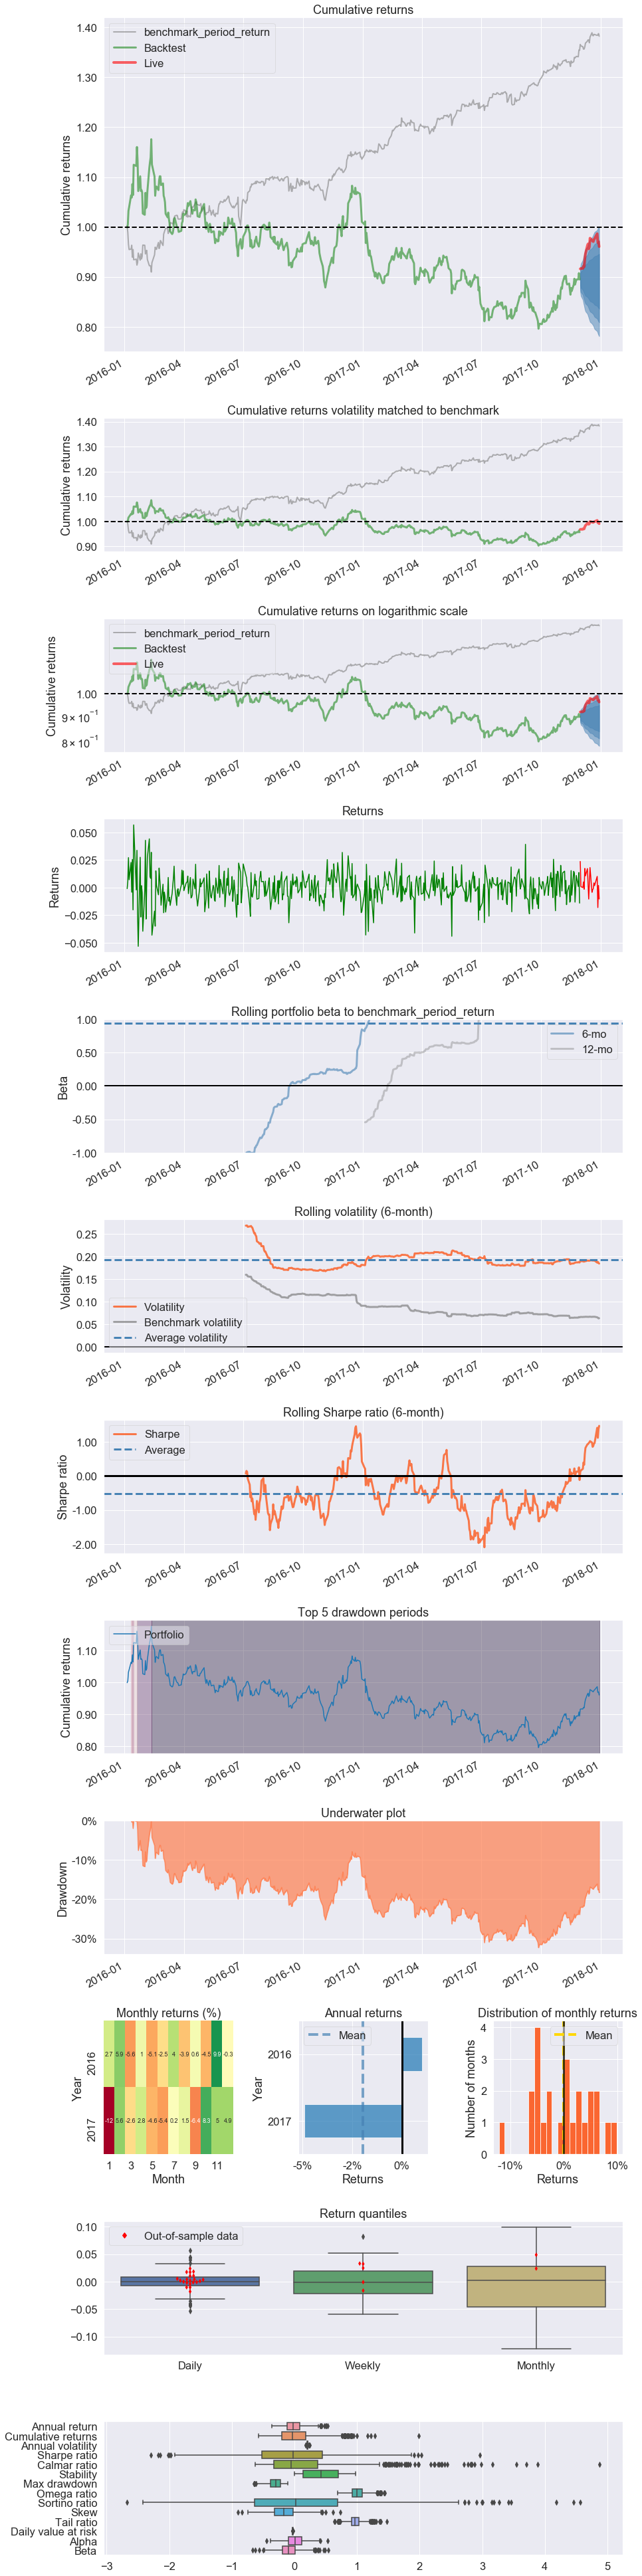

Stress Events,mean,min,max
New Normal,0.00%,-5.32%,5.69%


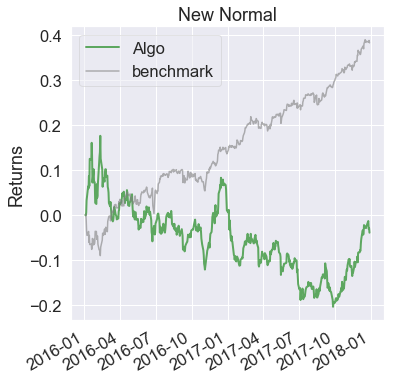

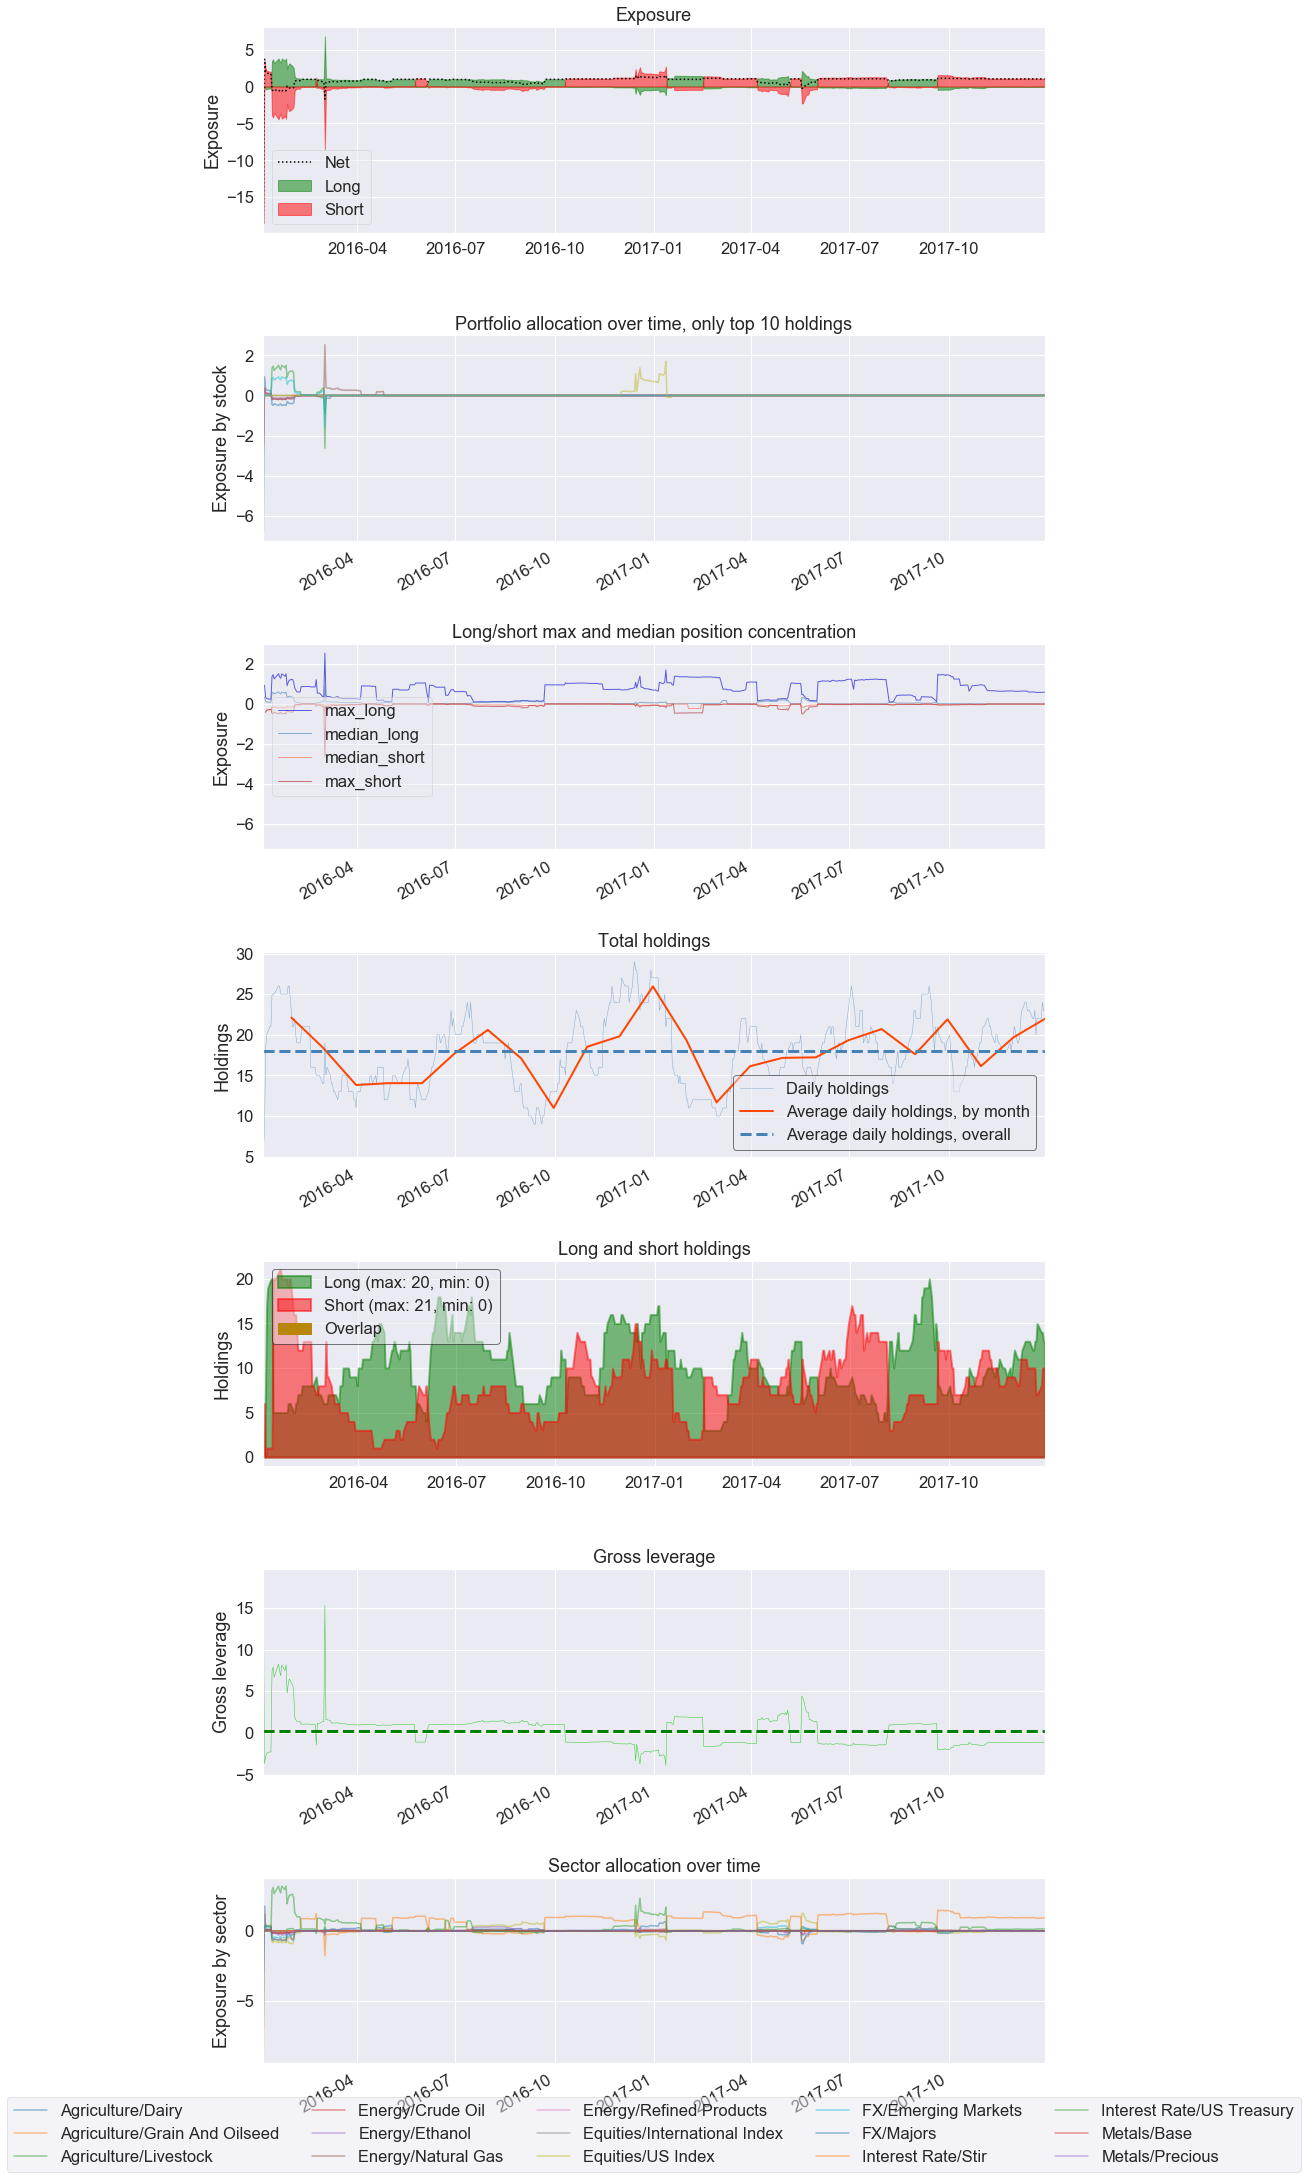

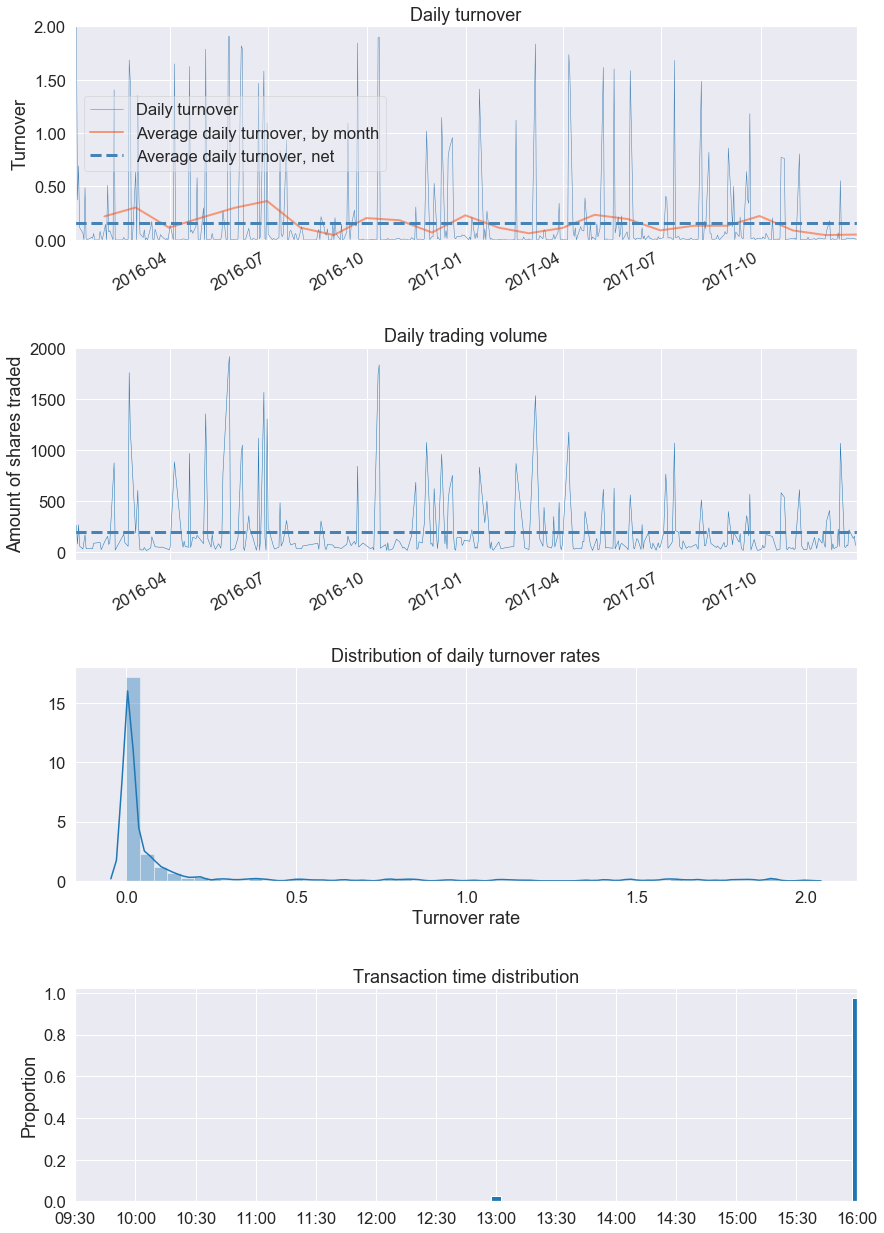

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,447.00,213.00,234.00
Percent profitable,0.47,0.46,0.47
Winning round_trips,209.00,99.00,110.00
Losing round_trips,232.00,111.00,121.00
Even round_trips,6.00,3.00,3.00


PnL stats,All trades,Short trades,Long trades
Total profit,$-393627.34,$-2221438.46,$1827811.11
Gross profit,$12703130.97,$4473015.43,$8230115.54
Gross loss,$-13096758.31,$-6694453.88,$-6402304.43
Profit factor,$0.97,$0.67,$1.29
Avg. trade net profit,$-880.60,$-10429.29,$7811.16
Avg. winning trade,$60780.53,$45181.97,$74819.23
Avg. losing trade,$-56451.54,$-60310.40,$-52911.61
Ratio Avg. Win:Avg. Loss,$1.08,$0.75,$1.41
Largest winning trade,$455050.00,$200000.00,$455050.00
Largest losing trade,$-146880.00,$-146880.00,$-133440.00


Duration stats,All trades,Short trades,Long trades
Avg duration,29 days 02:32:53.205816,26 days 19:20:16.962441,31 days 04:48:12.350427
Median duration,24 days 00:00:00,23 days 00:00:00,24 days 23:30:00
Longest duration,118 days 01:00:00,118 days 01:00:00,91 days 23:00:00
Shortest duration,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.02%,-0.02%,0.05%
Avg returns winning,0.17%,0.14%,0.19%
Avg returns losing,-0.11%,-0.14%,-0.08%
Median returns all round_trips,-0.00%,-0.00%,-0.00%
Median returns winning,0.04%,0.03%,0.04%
Median returns losing,-0.03%,-0.03%,-0.03%
Largest winning trade,2.84%,1.39%,2.84%
Largest losing trade,-1.63%,-1.63%,-1.17%


Symbol stats,BZG16,CLG16,RBG16,HOG16,BZH16,EHG16,CLH16,HOH16,RBH16,FFG16,NKH16,WH16,JYH16,CH16,MPH16,BPH16,KWH16,SMH16,ADH16,RUH16,CDH16,YMH16,MDH16,ESH16,NQH16,USH16,TYH16,ULH16,NGJ16,PAH16,HGH16,TUH16,RBJ16,FVH16,LNJ16,PLJ16,GCJ16,FFJ16,BOK16,CK16,KWK16,SMK16,WK16,SK16,SIK16,FFK16,BZN16,DAK16,EHM16,ECM16,EDM16,MPM16,ADM16,JYM16,CDM16,RUM16,ESM16,YMM16,MDM16,TYM16,USM16,ULM16,PAM16,GCM16,TUM16,LCM16,HON16,FVM16,FFM16,BZQ16,EHN16,CN16,BON16,SN16,KWN16,SMN16,LNN16,SIN16,HGN16,PLN16,RBQ16,BZU16,FFN16,DAN16,CLU16,GCQ16,LCQ16,RBU16,NKU16,KWU16,WU16,RUU16,YMU16,MDU16,ESU16,NQU16,ADU16,JYU16,EDU16,BPU16,MPU16,TYU16,USU16,ULU16,PAU16,SIU16,HGU16,NGV16,TUU16,FVU16,DAU16,LNV16,CLX16,NGX16,PLV16,LCV16,HOX16,FFV16,BZZ16,EHX16,SX16,CLZ16,HOZ16,RBZ16,FFX16,EHZ16,NKZ16,SMZ16,BOZ16,KWZ16,CZ16,WZ16,RUZ16,ESZ16,YMZ16,NQZ16,MDZ16,LNZ16,MPZ16,JYZ16,BPZ16,ECZ16,ADZ16,SFZ16,EDZ16,ULZ16,CLF17,TYZ16,USZ16,CDZ16,PAZ16,GCZ16,HGZ16,RBF17,HOF17,LCZ16,TUZ16,FVZ16,BZG17,EHF17,DAZ16,BOF17,CLG17,PLF17,NGG17,HOG17,RBG17,BZH17,DAF17,NGH17,GCG17,LCG17,NKH17,EDH17,BPH17,MPH17,ECH17,ADH17,JYH17,SFH17,SMH17,WH17,KWH17,BOH17,CDH17,RUH17,ESH17,YMH17,NQH17,MDH17,TYH17,ULH17,USH17,NGJ17,SIH17,HGH17,PAH17,FVH17,TUH17,LNJ17,NGK17,PLJ17,LCJ17,FFJ17,DAJ17,KWK17,SMK17,CK17,WK17,BOK17,SK17,CLM17,RBM17,HOM17,BZN17,NKM17,RUM17,MDM17,NQM17,YMM17,LNM17,ESM17,SFM17,EDM17,ECM17,ADM17,BPM17,MPM17,CLN17,CDM17,TYM17,USM17,ULM17,PAM17,NGN17,RBN17,FVM17,LCM17,HON17,TUM17,BZQ17,CN17,KWN17,BON17,SMN17,WN17,SN17,CLQ17,SIN17,NGQ17,PLN17,HOQ17,RBQ17,BZU17,FFN17,DAN17,LNQ17,NGU17,DAQ17,FFQ17,NKU17,KWU17,WU17,MDU17,YMU17,RUU17,NQU17,ESU17,ADU17,SFU17,BPU17,ECU17,MPU17,JYU17,CDU17,TYU17,ULU17,USU17,SIU17,HGU17,NGV17,PAU17,FVU17,HOV17,TUU17,DAU17,EHV17,LNV17,PLV17,NGX17,HOX17,BZZ17,DAV17,EHX17,SX17,CLZ17,NGZ17,HOZ17,RBZ17,BZF18,EHZ17,NKZ17,LNZ17,WZ17,CZ17,SMZ17,KWZ17,MDZ17,YMZ17,NQZ17,ESZ17,RUZ17,JYZ17,BPZ17,ECZ17,EDZ17,SFZ17,MPZ17,ADZ17,CLF18,CDZ17,ULZ17,USZ17,TYZ17,SIZ17,NGF18,HGZ17,GCZ17,PAZ17,FVZ17,TUZ17,HOF18,BZG18,EHF18,SMF18,SF18,CLG18,PLF18,NGG18,HOG18,FFF18,BZH18,EHG18,LCG18,SH18,CH18,KWH18,WH18,RUH18,MDH18,YMH18,ESH18,NQH18,EDH18,MPH18,ULH18,USH18,TYH18,SIH18,PAH18,HGH18,TUH18,FVH18
Avg returns all round_trips,0.79%,1.11%,0.94%,1.39%,-0.83%,-0.26%,-0.00%,-1.45%,0.00%,0.00%,0.13%,0.04%,-0.39%,-0.06%,0.02%,-0.07%,0.00%,0.01%,-0.11%,-0.05%,0.27%,-0.01%,0.02%,0.02%,-0.00%,1.38%,1.44%,2.46%,-0.02%,0.12%,-0.10%,-0.12%,-0.35%,1.31%,0.02%,-0.25%,-0.20%,-0.01%,0.13%,-0.02%,-0.10%,-0.02%,-0.08%,-0.04%,0.45%,0.00%,-0.00%,0.03%,0.00%,-0.01%,-0.02%,0.01%,-0.01%,0.05%,-0.01%,-0.00%,0.00%,0.00%,0.00%,-0.05%,-0.05%,-0.06%,-0.21%,0.03%,-0.02%,-0.01%,-0.05%,-0.03%,-0.24%,-0.00%,0.01%,-0.04%,-0.02%,0.05%,-0.02%,0.04%,-0.00%,0.01%,-0.02%,-0.00%,0.12%,-0.44%,-0.05%,0.02%,-0.34%,0.16%,0.14%,-0.18%,-0.11%,0.13%,0.17%,-0.16%,0.08%,0.05%,0.10%,0.46%,-0.10%,-0.31%,-0.14%,0.01%,0.05%,0.07%,0.38%,0.43%,0.26%,0.13%,-0.23%,0.01%,0.05%,0.01%,0.77%,0.63%,-0.01%,0.00%,0.10%,-0.24%,-0.00%,-0.00%,0.01%,-0.04%,-0.04%,0.02%,0.02%,0.02%,0.03%,-0.02%,-0.07%,0.03%,-0.32%,-0.01%,0.08%,-0.00%,0.00%,-0.02%,-0.13%,0.01%,-0.03%,-0.02%,0.06%,-0.24%,-0.03%,-0.90%,-0.02%,-0.58%,-0.01%,-0.04%,0.02%,-0.05%,-0.05%,0.02%,-0.03%,-0.26%,-0.16%,-0.08%,0.01%,0.02%,-0.03%,-0.05%,-0.03%,-0.02%,-0.00%,0.11%,-0.02%,-0.06%,0.28%,-0.02%,-0.02%,-0.01%,0.06%,-0.08%,0.13%,0.01%,-0.00%,-0.04%,-0.03%,-0.01%,-0.03%,0.21%,-0.02%,-0.04%,-0.03%,-0.00%,-0.00%,-0.11%,0.55%,-0.03%,-0.05%,-0.06%,-0.07%,-0.01%,0.18%,0.33%,0.21%,0.01%,-0.02%,0.10%,0.01%,0.16%,-0.01%,0.06%,-0.22%,0.32%,-0.02%,0.03%,-0.05%,0.19%,0.20%,0.02%,0.12%,0.28%,0.39%,-0.18%,-0.28%,-0.51%,-0.84%,-0.21%,0.60%,-0.03%,-0.04%,-0.27%,0.14%,-0.04%,0.02%,0.02%,0.02%,-0.17%,-0.19%,-0.05%,0.02%,-0.22%,0.02%,0.03%,-0.49%,-0.76%,-0.01%,-0.00%,0.02%,-0.06%,-0.02%,0.02%,-0.01%,0.04%,-0.71%,0.02%,-0.00%,-0.46%,-0.01%,0.01%,-0.13%,-0.01%,-0.12%,0.03%,0.04%,0.04%,-0.50%,-0.00%,-0.01%,0.00%,0.01%,0.02%,-0.22%,0.06%,0.04%,-0.09%,0.16%,0.08%,0.02%,0.09%,0.32%,0.02%,0.03%,0.37%,0.11%,-0.11%,0.11%,0.03%,0.0

Profitability (PnL / PnL total) per name,
symbol,
BOZ16,55.83%
PAH17,45.15%
CN17,43.72%
ADM17,43.49%
BPM17,39.06%
DAN16,37.07%
ADZ17,35.36%
NGG17,33.90%
PLJ16,33.74%


Profitability (PnL / PnL total) per name,
symbol,
FX/Majors,288.15%
Metals/Precious,150.90%
Agriculture/Grain And Oilseed,146.43%
Interest Rate/US Treasury,103.56%
Energy/Refined Products,90.45%
Energy/Crude Oil,66.97%
Interest Rate/Stir,40.31%
Energy/Natural Gas,30.29%
Agriculture/Livestock,-5.31%


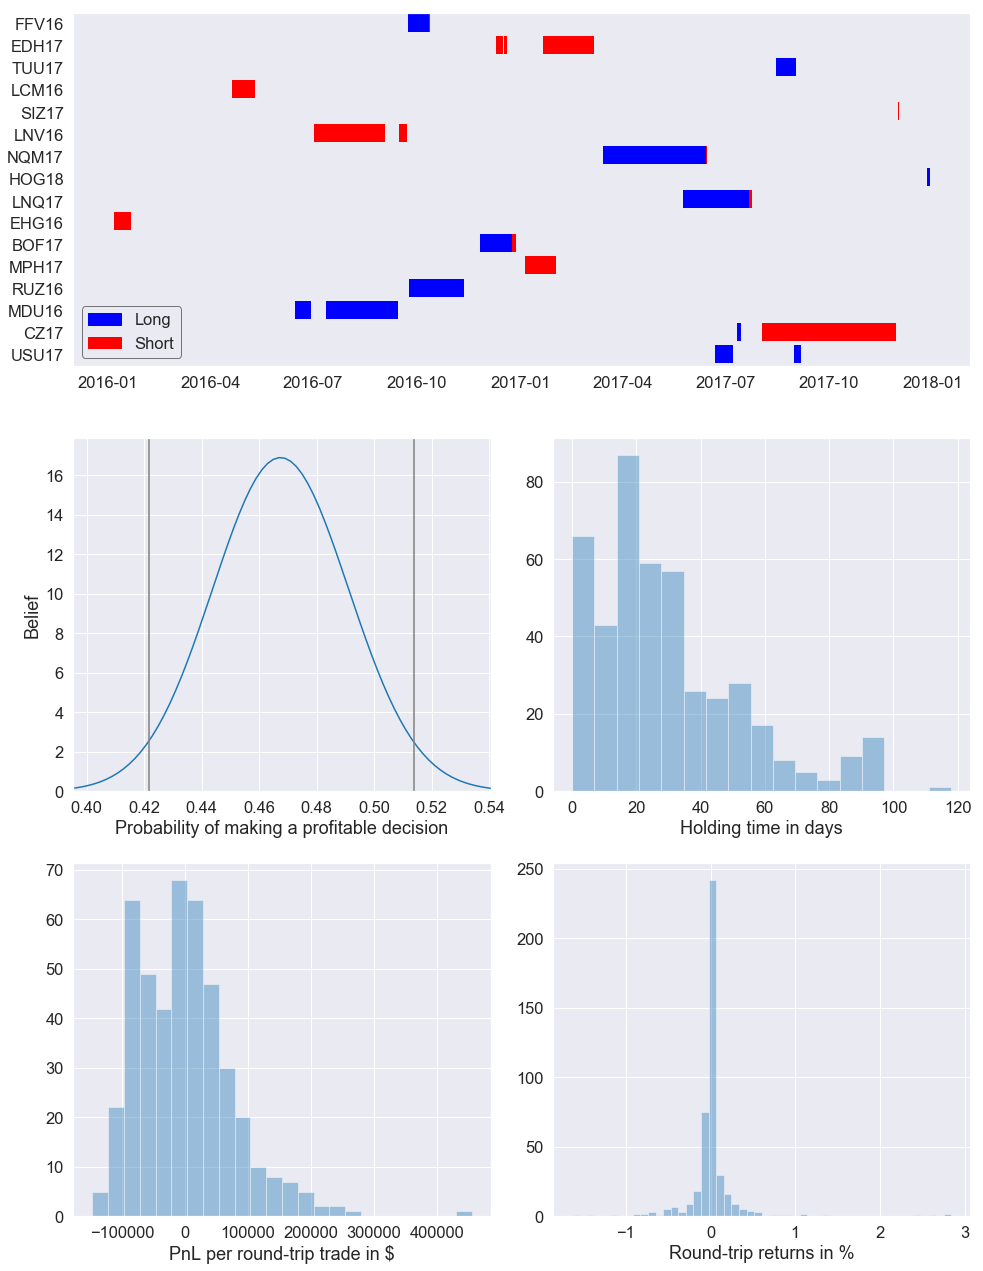

In [7]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions_mod,
                          live_start_date=out_of_sample, round_trips=True, benchmark_rets=benchmark,
                          sector_mappings=sector_map, hide_positions=True)

# PnL by root symbol in dollars and % of total PnL

In [8]:
from pyfolio.round_trips import extract_round_trips, add_closing_transactions, apply_sector_mappings_to_round_trips
trips = add_closing_transactions(positions, transactions_mod)
trips['value'] = -trips.amount * trips.price
trips['root_symbol'] = trips['symbol'].apply(lambda x: x.root_symbol)
trips = trips.groupby(by='root_symbol').sum().sort_values(by='value', ascending=False)
trips['percent'] = round(trips.value.divide(abs(trips.value.sum())) * 100, 1)
del trips['amount']
del trips['price']
trips

,value,percent
root_symbol,,
YM,960490.000,244.0
ES,678100.000,172.3
NQ,569860.000,144.8
MD,311010.000,79.0
RU,192525.000,48.9
EH,191719.000,48.7
_S,186262.500,47.3
NK,153234.650,38.9
LN,131724.000,33.5


# Visualization of trades for given root symbol

In [9]:
root = 'ES'

In [10]:
from utils import future, continuous_future, history
import matplotlib.pyplot as plt
%matplotlib inline

def his(root, field='price'):
    return history(
                   assets=[continuous_future(root,
                                     offset=0,
                                     adjustment=None,
                                     roll_style='volume')],
                    end_dt=results.index[-1],
                    bar_count=len(results),
                    frequency='1d',
                    field=field,
                    data_frequency='daily'
                    )

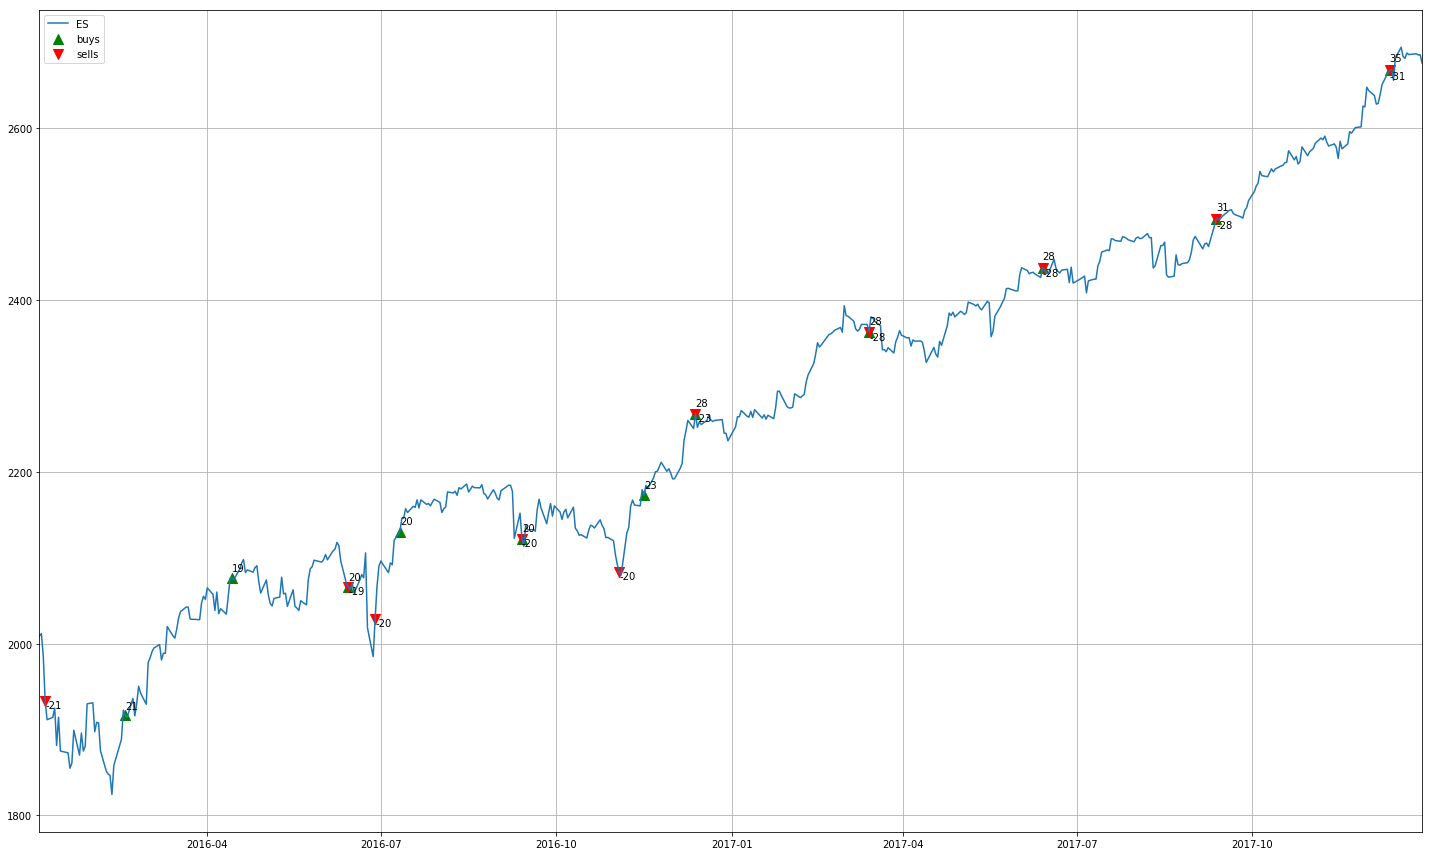

In [11]:
h = his(root)
h.columns=[root]

transactions['root_symbol'] = transactions['symbol'].apply(lambda x: x.root_symbol)
selected = transactions[transactions['root_symbol'] == root]
selected.index = selected.index.normalize()
buys = selected[selected['amount'] > 0]
sells = selected[selected['amount'] < 0]

plt.figure(figsize=(20,12))
plt.plot(h, label=root)
plt.scatter(buys.index, h.loc[buys.index], label='buys', color='green', s=100, marker="^")
plt.scatter(sells.index, h.loc[sells.index], label='sells', color='red', s=100, marker="v")
for i, txt in enumerate(buys['amount'].values):
    plt.annotate(txt, (buys.index[i], h.loc[buys.index[i]][root]*1.004))
for i, txt in enumerate(sells['amount'].values):
    plt.annotate(txt, (sells.index[i], h.loc[sells.index[i]][root]*.996))
plt.xlim(h.index.min(), h.index.max())
plt.legend(loc='best')
plt.grid()
#plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show();

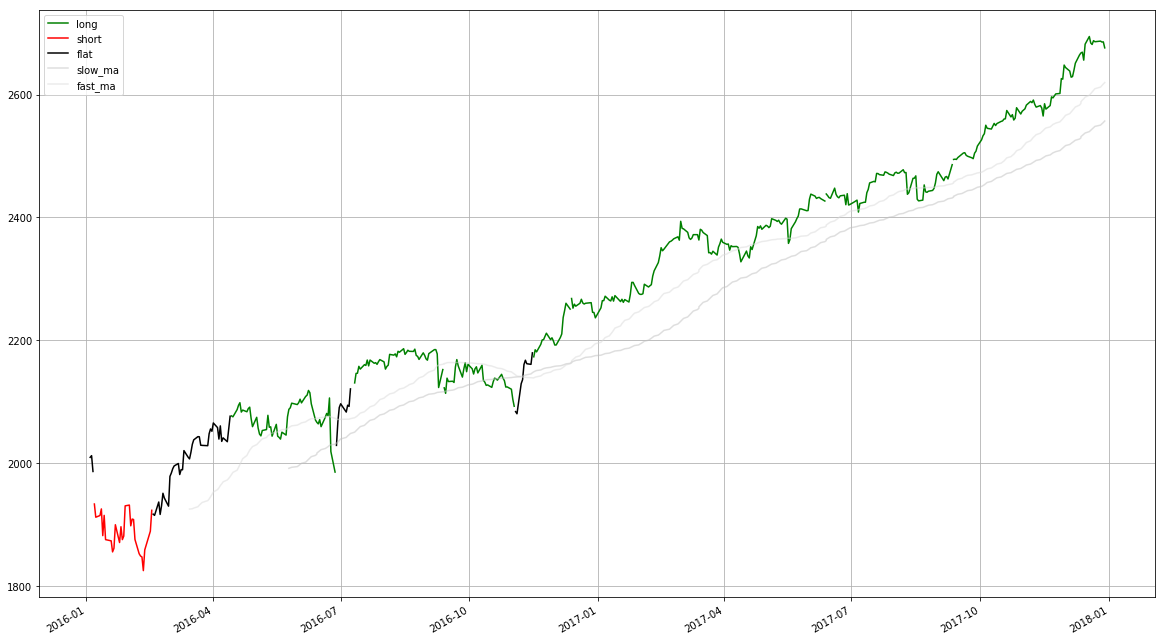

In [12]:
chart = h.copy()
chart = chart.join(selected.amount)
chart.amount = chart.amount.fillna(0)
chart.ix[0, 'amount']=0
chart['cumulative'] = chart['amount'].cumsum(skipna=False)

chart['long'] = chart['cumulative'] > 0
chart['short'] = chart['cumulative'] < 0
chart['flat'] = chart['cumulative'] == 0
chart['long'] = chart['long'] * chart[root]
chart['short'] = chart['short'] * chart[root]
chart['flat'] = chart['flat'] * chart[root]
chart['slow_ma'] = chart[root].rolling(100).mean()
chart['fast_ma'] = chart[root].rolling(50).mean()
chart = chart[['long', 'short', 'flat', 'slow_ma', 'fast_ma']].applymap(lambda x: x if x != 0 else np.nan)

chart['long'].plot(figsize=(20,12), legend=True, color='green')
chart['short'].plot(legend=True, color='red')
chart['flat'].plot(legend=True, color='black')
chart['slow_ma'].plot(legend=True, color='.75', alpha=0.5)
chart['fast_ma'].plot(legend=True, color='.85', alpha=0.5)
plt.grid();

In [13]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

full_h = his(root)
full_h.columns = ['close']
for field in ['open', 'high', 'low',]:
    full_h[field] = his(root, field)

In [14]:
exclude_rolls = False
if exclude_rolls:
    intersection = buys.index.intersection(sells.index)
    buys = buys.drop(intersection)
    sells = sells.drop(intersection)

In [15]:
trace1 = go.Candlestick(x=full_h.index, 
                        open=full_h.open,
                        high=full_h.high,
                        low=full_h.low,
                        close=full_h.close, 
                        name=root, 
                        hoverinfo='none',
                       )


params = {
    'mode': 'markers',
    'hoverinfo': 'text',
}
trace2 = go.Scatter(
    x=buys.index,
    y=buys['price'],
    name='Buys',
    text=list(buys['amount']),
    textposition='middle left',
    marker=dict(size=8,
                color='rgba(0, 0, 128, .9)'),
    **params,
)
trace3 = go.Scatter(
    x=sells.index,
    y=sells['price'],
    name='Sells',
    text=list(sells['amount']),
    textposition='middle right',
    marker=dict(size=8,
                color='rgba(255, 255, 0, .9)'),
    **params
)

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace1, trace2, trace3]
fig = go.Figure(data=data,layout=layout)

py.iplot(fig, filename='candlestick_chart')

In [16]:
transactions[transactions['root_symbol']==root]

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2016-01-07 21:00:00+00:00,-21,None,2016-01-07 21:00:00+00:00,c737d477c9cf4e1f89ca3c3333c458ed,1987.75,Future(16721 [ESH16]),Future(16721 [ESH16]),2087137.5,ES
2016-02-18 21:00:00+00:00,21,None,2016-02-18 21:00:00+00:00,9f2501daee694dd9950dfccf625328da,1922.75,Future(16721 [ESH16]),Future(16721 [ESH16]),-2018887.5,ES
2016-04-14 20:00:00+00:00,19,None,2016-04-14 20:00:00+00:00,d0ba9222768f4e109082616ddac84f3a,2076.25,Future(17483 [ESM16]),Future(17483 [ESM16]),-1972437.5,ES
2016-06-14 20:00:00+00:00,20,None,2016-06-14 20:00:00+00:00,11fb9acd164745d592e091014cbe5930,2067.25,Future(18242 [ESU16]),Future(18242 [ESU16]),-2067250.0,ES
2016-06-14 20:00:00+00:00,-19,None,2016-06-14 20:00:00+00:00,c85dc6a6415440da947a6b54b2c084da,2077.00,Future(17483 [ESM16]),Future(17483 [ESM16]),1973150.0,ES
2016-06-28 20:00:00+00:00,-20,None,2016-06-28 20:00:00+00:00,1531dbd29cc949bda2eba88e1098257d,1982.50,Future(18242 [ESU16]),Future(18242 [ESU16]),1982500.0,ES
2016-07-11 20:00:00+00:00,20,None,2016-07-11 20:00:00+00:00,282370c4d71b4db6900c8c29a3475fbc,2120.25,Future(18242 [ESU16]),Future(18242 [ESU16]),-2120250.0,ES
2016-09-13 20:00:00+00:00,-20,None,2016-09-13 20:00:00+00:00,758bdf5a783e45cbb066f9c1d5779a0e,2156.25,Future(18242 [ESU16]),Future(18242 [ESU16]),2156250.0,ES
2016-09-13 20:00:00+00:00,20,None,2016-09-13 20:00:00+00:00,fb82f82813274f2d9659e269f0ae8e41,2150.50,Future(19020 [ESZ16]),Future(19020 [ESZ16]),-2150500.0,ES
2016-11-03 20:00:00+00:00,-20,None,2016-11-03 20:00:00+00:00,16403ed4c1cb478dac828bfd77d9815f,2088.25,Future(19020 [ESZ16]),Future(19020 [ESZ16]),2088250.0,ES
